<a href="https://colab.research.google.com/github/Nils0217/Advanced-statistical-analysis-of-Tatte-s-customer-consumption-habits-using-Python/blob/main/task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJECT OVERVIEW
For this project, our team decided to gather observational data at Tatte.

Hypothesis:

H₀ (Null Hypothesis): The proportion of Tatte customers who take carry-out on a sunny day is 50%. H0:p=0.50H0​:p=0.50

H₁ (Alternative Hypothesis): The proportion of Tatte customers who take carry-out on a sunny day is not 50%. H1:p≠0.50H1​:p=0.50 (→ two-tailed test)

In [1]:
from scipy.stats import norm
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('tattedata.csv')
df.head()

Saving tattedata.csv to tattedata.csv


,Transaction_ID,Day of the Week,Weather,Tempture,Group Size,Male,Female,Order Type,Food,Dessert,Drink,Cost
0,1001,Tue,Raining,58,2,0,2,Take out,1,0,2,21.59
1,1002,Tue,Raining,58,1,0,1,Take out,0,0,1,4.20
2,1003,Tue,Raining,58,1,0,1,Take out,1,0,0,13.19
3,1004,Tue,Raining,58,1,1,0,Take out,0,0,1,4.20
4,1005,Tue,Raining,58,2,1,1,Dine in,1,0,1,17.39


#**Data Cleaning and Standardization**




In [3]:

df_cleaned = df.copy()

# 1. Fix the typo from Tempture to Temperature
df_cleaned = df_cleaned.rename(columns={'Tempture': 'Temperature'})

# 2. Align values in the Weather column and remove trailing spaces
weather_mapping = {
    'Raining': 'Raining',
    'Sunny': 'Sunny',
    'Cloudy': 'Cloudy',
    'raining': 'Raining',
    'sunny': 'Sunny',
    'cloudy': 'Cloudy',
    'Sunny ': 'Sunny', # Added mapping for 'Sunny '
    'Cloudy ': 'Cloudy' # Added mapping for 'Cloudy '
}
df_cleaned['Weather'] = df_cleaned['Weather'].map(weather_mapping).fillna(df_cleaned['Weather'])
df_cleaned['Weather'] = df_cleaned['Weather'].str.strip() # Remove leading/trailing spaces

# 3. Align values in the Order Type column and remove trailing spaces
order_type_mapping = {
    'Dine in': 'Dine in',
    'Take out': 'Take out',
    'Dine In': 'Dine in',
    'Take Out': 'Take out',
    'Dine In ': 'Dine in', # Added mapping for 'Dine In '
    'Take out ': 'Take out' # Added mapping for 'Take out '
}
df_cleaned['Order Type'] = df_cleaned['Order Type'].map(order_type_mapping).fillna(df_cleaned['Order Type'])
df_cleaned['Order Type'] = df_cleaned['Order Type'].str.strip() # Remove leading/trailing spaces


# Display the first few rows of the cleaned dataframe
display(df_cleaned.head())

# Display unique values in the cleaned columns to verify
print("\nUnique values in cleaned 'Weather' column:")
print(df_cleaned['Weather'].unique())

print("\nUnique values in cleaned 'Order Type' column:")
print(df_cleaned['Order Type'].unique())

,Transaction_ID,Day of the Week,Weather,Temperature,Group Size,Male,Female,Order Type,Food,Dessert,Drink,Cost
0,1001,Tue,Raining,58,2,0,2,Take out,1,0,2,21.59
1,1002,Tue,Raining,58,1,0,1,Take out,0,0,1,4.20
2,1003,Tue,Raining,58,1,0,1,Take out,1,0,0,13.19
3,1004,Tue,Raining,58,1,1,0,Take out,0,0,1,4.20
4,1005,Tue,Raining,58,2,1,1,Dine in,1,0,1,17.39



Unique values in cleaned 'Weather' column:
['Raining' 'Sunny' 'Cloudy']

Unique values in cleaned 'Order Type' column:
['Take out' 'Dine in']


In [4]:
df_cleaned.head()

,Transaction_ID,Day of the Week,Weather,Temperature,Group Size,Male,Female,Order Type,Food,Dessert,Drink,Cost
0,1001,Tue,Raining,58,2,0,2,Take out,1,0,2,21.59
1,1002,Tue,Raining,58,1,0,1,Take out,0,0,1,4.20
2,1003,Tue,Raining,58,1,0,1,Take out,1,0,0,13.19
3,1004,Tue,Raining,58,1,1,0,Take out,0,0,1,4.20
4,1005,Tue,Raining,58,2,1,1,Dine in,1,0,1,17.39


#** Remove white space and lowercase all value for better management

In [5]:
# Step 1: strip and lowercase all string values
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        # Apply strip() after lower() to handle leading/trailing spaces consistently
        df_cleaned[col] = df_cleaned[col].str.lower().str.strip()

# Step 2: create new column call 'sunny' from weather column
# Ensure consistent lowercase 'sunny' check
df_cleaned['Sunny'] = df_cleaned['Weather'].apply(lambda x: 1 if x == 'sunny' else 0)

# Step 3: create new column call carry_out from 'order type' column
# Ensure consistent lowercase 'take out' and 'dine in' checks
df_cleaned['Carry_out'] = df_cleaned['Order Type'].apply(lambda x: 1 if x == 'take out' else 0)

# Display the first few rows of the modified dataframe
display(df_cleaned.head())

# Display unique values in the new columns to verify
print("\nUnique values in 'sunny' column:")
print(df_cleaned['Sunny'].unique())

print("\nUnique values in 'carry_out' column:")
print(df_cleaned['Carry_out'].unique())

# Display unique values in Weather and Order Type to double check
print("\nUnique values in cleaned 'Weather' column:")
print(df_cleaned['Weather'].unique())

print("\nUnique values in cleaned 'Order Type' column:")
print(df_cleaned['Order Type'].unique())

,Transaction_ID,Day of the Week,Weather,Temperature,Group Size,Male,Female,Order Type,Food,Dessert,Drink,Cost,Sunny,Carry_out
0,1001,tue,raining,58,2,0,2,take out,1,0,2,21.59,0,1
1,1002,tue,raining,58,1,0,1,take out,0,0,1,4.20,0,1
2,1003,tue,raining,58,1,0,1,take out,1,0,0,13.19,0,1
3,1004,tue,raining,58,1,1,0,take out,0,0,1,4.20,0,1
4,1005,tue,raining,58,2,1,1,dine in,1,0,1,17.39,0,0



Unique values in 'sunny' column:
[0 1]

Unique values in 'carry_out' column:
[1 0]

Unique values in cleaned 'Weather' column:
['raining' 'sunny' 'cloudy']

Unique values in cleaned 'Order Type' column:
['take out' 'dine in']


In [6]:
df_cleaned.head()

,Transaction_ID,Day of the Week,Weather,Temperature,Group Size,Male,Female,Order Type,Food,Dessert,Drink,Cost,Sunny,Carry_out
0,1001,tue,raining,58,2,0,2,take out,1,0,2,21.59,0,1
1,1002,tue,raining,58,1,0,1,take out,0,0,1,4.20,0,1
2,1003,tue,raining,58,1,0,1,take out,1,0,0,13.19,0,1
3,1004,tue,raining,58,1,1,0,take out,0,0,1,4.20,0,1
4,1005,tue,raining,58,2,1,1,dine in,1,0,1,17.39,0,0


#**Count our target value for analysis check
**Understand the data 1**


1.   Sunny days
2.   Take out

In [7]:
# 1. Check the total number which shows '1' in sunny and carry_out column seperately
count_sunny = df_cleaned['Sunny'].sum()
count_carry_out = df_cleaned['Carry_out'].sum()

print(f"Total sunny days: {count_sunny} out of {len(df_cleaned)}")
print(f"Total carry-out orders: {count_carry_out} out of {len(df_cleaned)}")

# 2. preform a table shows column[weather, sunny, order type, carry_out]
df_values_table = df_cleaned[['Weather', 'Sunny', 'Order Type', 'Carry_out']]
display(df_values_table.head())

Total sunny days: 82 out of 185
Total carry-out orders: 91 out of 185


,Weather,Sunny,Order Type,Carry_out
0,raining,0,take out,1
1,raining,0,take out,1
2,raining,0,take out,1
3,raining,0,take out,1
4,raining,0,dine in,0


#**Order number in differnet weather condition


1.   sunny
2.   cloudy
3.   raining



In [8]:
# Calculate the summary for weather conditions
weather_summary = df_cleaned['Weather'].value_counts().reset_index()
weather_summary.columns = ['Weather', 'Count']
display(weather_summary)

,Weather,Count
0,sunny,82
1,cloudy,81
2,raining,22


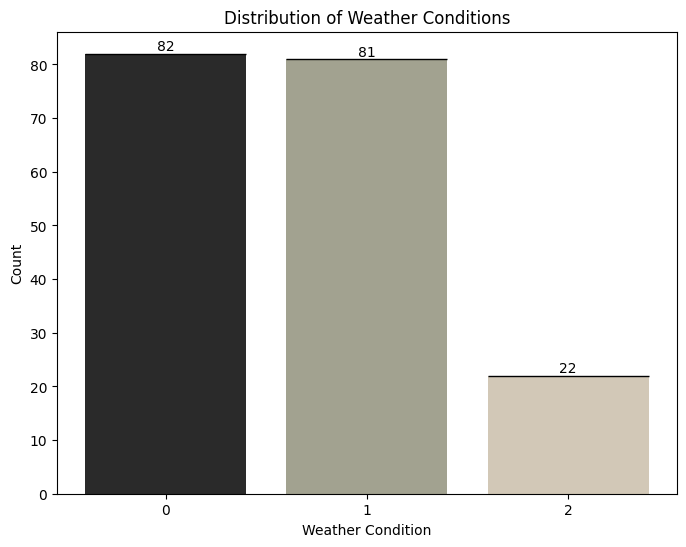

In [9]:
# Visualization for Step 1: Weather Condition Distribution
colors = ['#2A2A2A', '#A5A58D', '#D6C9B3', '#8B6B4F', '#B8B9AE']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=weather_summary.index, y='Count', data=weather_summary, palette=colors)
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')

# Add mark line and number on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
    for bar in container:
        yval = bar.get_height()
        plt.hlines(yval, bar.get_x(), bar.get_x() + bar.get_width(), color='black', linewidth=1)

plt.show()

**Understand the data 2**


1.   Dine in
2.   Take out



In [10]:
# Step 2: Order Type Distribution Analysis
order_type_distribution = df_cleaned['Order Type'].value_counts()
order_type_proportion = df_cleaned['Order Type'].value_counts(normalize=True) * 100

print("Order Type Distribution:")
print(order_type_distribution)
print("\nOrder Type Proportion (%):")
print(order_type_proportion)

# Optional: Display as a table for better readability
order_type_summary = pd.DataFrame({
    'Count': order_type_distribution,
    'Proportion (%)': order_type_proportion
})
display(order_type_summary)

Order Type Distribution:
Order Type
dine in     94
take out    91
Name: count, dtype: int64

Order Type Proportion (%):
Order Type
dine in     50.810811
take out    49.189189
Name: proportion, dtype: float64


,Count,Proportion (%)
Order Type,,
dine in,94,50.810811
take out,91,49.189189


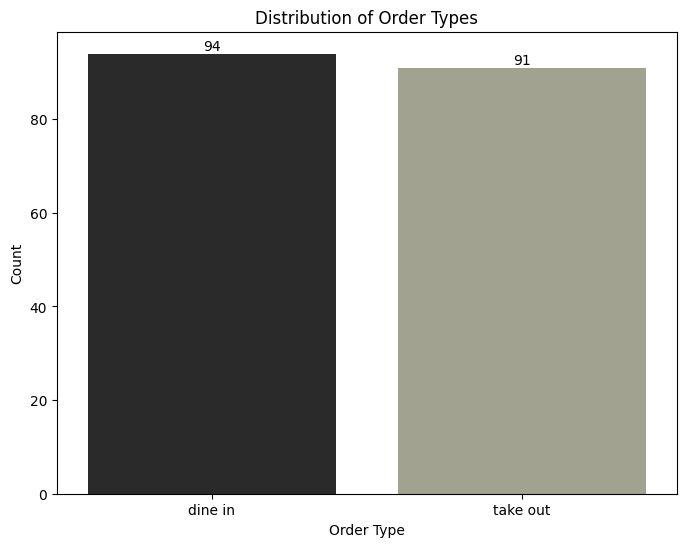

In [11]:
# Visualization for Step 2: Order Type Distribution
colors = ['#2A2A2A', '#A5A58D', '#D6C9B3', '#8B6B4F', '#B8B9AE']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=order_type_summary.index, y='Count', data=order_type_summary, palette=colors)
plt.title('Distribution of Order Types')
plt.xlabel('Order Type')
plt.ylabel('Count')

# Add number on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

**Understand the data 3**

Proportion of take out in different weather condition


1.   Cloudy
2.   Raining
3.   Sunny



In [12]:
# Step 3: Carry-out analysis by Weather
carry_out_by_weather = df_cleaned.groupby('Weather')['Carry_out'].agg(['count', 'sum']).reset_index()
carry_out_by_weather = carry_out_by_weather.rename(columns={'count': 'Total Rows', 'sum': 'Carry-out Count'})
carry_out_by_weather['Carry-out Proportion (%)'] = (carry_out_by_weather['Carry-out Count'] / carry_out_by_weather['Total Rows']) * 100

print("Carry-out Statistics by Weather Condition:")
display(carry_out_by_weather)

Carry-out Statistics by Weather Condition:


,Weather,Total Rows,Carry-out Count,Carry-out Proportion (%)
0,cloudy,81,49,60.493827
1,raining,22,10,45.454545
2,sunny,82,32,39.024390


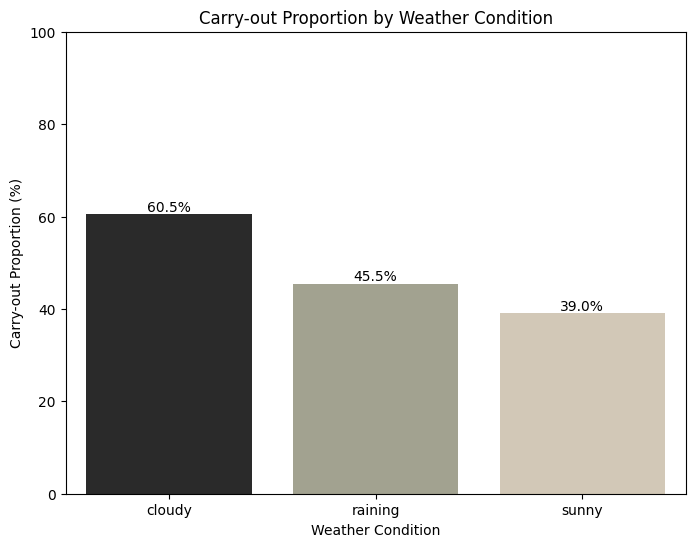

In [13]:
# Visualization for Step 3: Carry-out analysis by Weather
colors = ['#2A2A2A', '#A5A58D', '#D6C9B3', '#8B6B4F', '#B8B9AE']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Weather', y='Carry-out Proportion (%)', data=carry_out_by_weather, palette=colors)
plt.title('Carry-out Proportion by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Carry-out Proportion (%)')
plt.ylim(0, 100) # Set y-axis limit to 100%

# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

#**Statistic moment**
Hypothesis:

H₀ (Null Hypothesis): The proportion of Tatte customers who take carry-out on a sunny day is 50%. H0:p=0.50

H₁ (Alternative Hypothesis): The proportion of Tatte customers who take carry-out on a sunny day is not 50%. H1:p≠0.50

(→ two-tailed test)

#**Two tails z-test

In [14]:
# Calculate sample statistics for sunny day transactions
# Perform one-proportion z-test using manual calculation

# Filter for sunny days
sunny_days_df = df_cleaned[df_cleaned['Weather'] == 'sunny']

# Calculate the number of carry-out orders on sunny days
carry_out_sunny_count = sunny_days_df['Carry_out'].sum()

# Calculate the total number of transactions on sunny days
total_sunny_transactions = len(sunny_days_df)

# Calculate the sample proportion of carry-out orders on sunny days
sample_proportion = carry_out_sunny_count / total_sunny_transactions

# Null hypothesis proportion
hypothesized_proportion = 0.50

# Standard error under the null hypothesis
# Using hypothesized_proportion (p0) for standard error calculation under H0
se = math.sqrt(hypothesized_proportion * (1 - hypothesized_proportion) / total_sunny_transactions)

# Z-statistic
z_stat = (sample_proportion - hypothesized_proportion) / se

# Two-tailed p-value
# Using the cumulative distribution function (cdf) of the standard normal distribution
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

print(f"Sample Proportion of Carry-out on Sunny Days: {sample_proportion:.4f}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Significance level (alpha) for a 95% confidence level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print(f"\nWith a p-value of {p_value:.4f} (less than alpha = {alpha}), we reject the null hypothesis.")
    print("Conclusion: The proportion of Tatte customers who take carry-out on a sunny day is significantly different from 50%.")
else:
    print(f"\nWith a p-value of {p_value:.4f} (greater than or equal to alpha = {alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to conclude that the proportion of Tatte customers who take carry-out on a sunny day is significantly different from 50%.")

Sample Proportion of Carry-out on Sunny Days: 0.3902
Z-statistic: -1.9878
P-value: 0.0468

With a p-value of 0.0468 (less than alpha = 0.05), we reject the null hypothesis.
Conclusion: The proportion of Tatte customers who take carry-out on a sunny day is significantly different from 50%.


#** Forcasting the future with 95% confidency for new entery of the customer

In [15]:
# Calculate the 95% Confidence Interval for Sunny-day Carry-out Proportion

# We already have:
# sample_proportion (p_hat) from cell -TLgMedmkP4P
# total_sunny_transactions (n) from cell -TLgMedmkP4P

# Critical z-value for 95% confidence level (two-tailed)
# This is the same as z_crit calculated in the visualization cell, if you ran it.
# Alternatively, calculate using norm.ppf(1 - alpha/2) where alpha = 0.05
z_crit = norm.ppf(1 - 0.05/2) # For 95% confidence

# Standard error for the confidence interval
# Use sample_proportion (p_hat) for the standard error in confidence interval calculation
se_ci = math.sqrt(sample_proportion * (1 - sample_proportion) / total_sunny_transactions)

# Calculate the margin of error
margin_of_error = z_crit * se_ci

# Calculate the confidence interval
ci_low = sample_proportion - margin_of_error
ci_high = sample_proportion + margin_of_error

print(f"Sample Proportion (p-hat): {sample_proportion:.4f}")
print(f"Z-critical value for 95% CI: {z_crit:.4f}")
print(f"Standard Error for CI: {se_ci:.4f}")
print(f"Margin of Error: {margin_of_error:.4f}")
print(f"95% Confidence Interval: ({ci_low:.4f}, {ci_high:.4f})")

Sample Proportion (p-hat): 0.3902
Z-critical value for 95% CI: 1.9600
Standard Error for CI: 0.0539
Margin of Error: 0.1056
95% Confidence Interval: (0.2847, 0.4958)


***We are 95% confident that when a new customer enter tatte in 'Sunny day' will have 28% - 50% to place a take out order.***

#**Appendix**



***According to the heatmap there are negative relationship with listed value to take out.***

***Possible explanation: There shall be others factor influence customer to order take out in Tatte.***

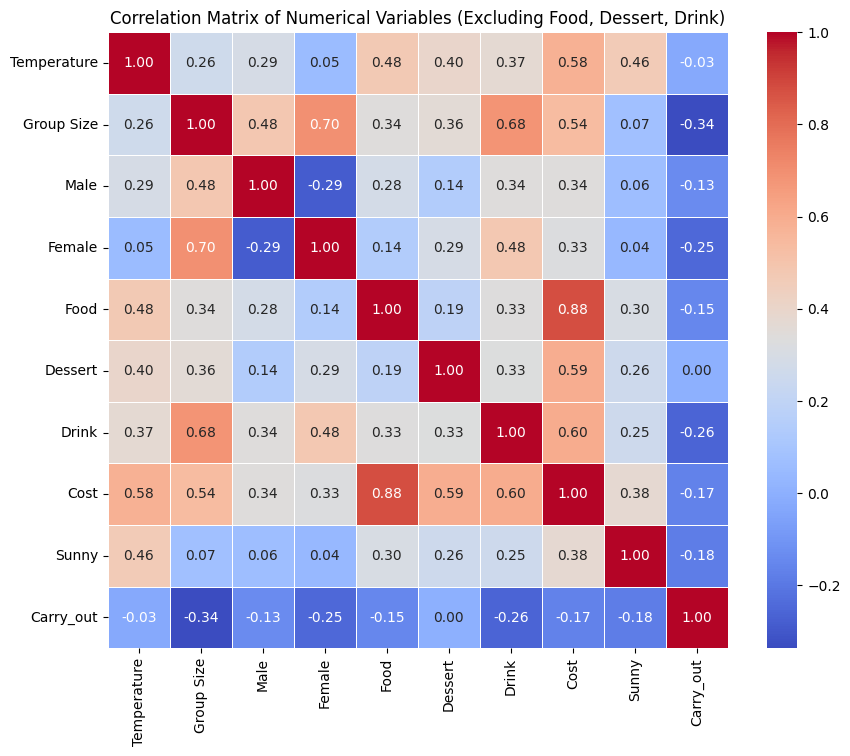

In [16]:
# Correlation Graph (Heatmap) - Excluding Food, Dessert, Drink

# Select only numerical columns for correlation analysis
# Exclude Transaction_ID as it's an identifier, and the binary columns sunny and carry_out, and the requested columns
numerical_df = df_cleaned.select_dtypes(include=np.number).drop(columns=['Transaction_ID', 'sunny', 'carry_out'], errors='ignore')

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables (Excluding Food, Dessert, Drink)')
plt.show()

**Chi-Square Test for Independence between Weather and Order Type**

In [17]:
# Create a contingency table of the two categorical variables
contingency_table = pd.crosstab(df_cleaned['Weather'], df_cleaned['Order Type'])

print("Contingency Table (Weather vs. Order Type):")
display(contingency_table)

# Perform the Chi-Square test for independence
from scipy.stats import chi2_contingency

chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
# print("\nExpected Frequencies:")
# display(pd.DataFrame(expected_freq, index=contingency_table.index, columns=contingency_table.columns))


# Interpret the results
alpha = 0.05

if p_value < alpha:
    print(f"\nWith a p-value of {p_value:.4f} (less than alpha = {alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a significant association between Weather and Order Type.")
else:
    print(f"\nWith a p-value of {p_value:.4f} (greater than or equal to alpha = {alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no significant association between Weather and Order Type.")

Contingency Table (Weather vs. Order Type):


Order Type,dine in,take out
Weather,,
cloudy,32,49
raining,12,10
sunny,50,32



Chi-Square Statistic: 7.6543
P-value: 0.0218
Degrees of Freedom: 2

With a p-value of 0.0218 (less than alpha = 0.05), we reject the null hypothesis.
Conclusion: There is a significant association between Weather and Order Type.


#**Analysis Tatte's customer format






**Knowing the group size of the Tatte customer**

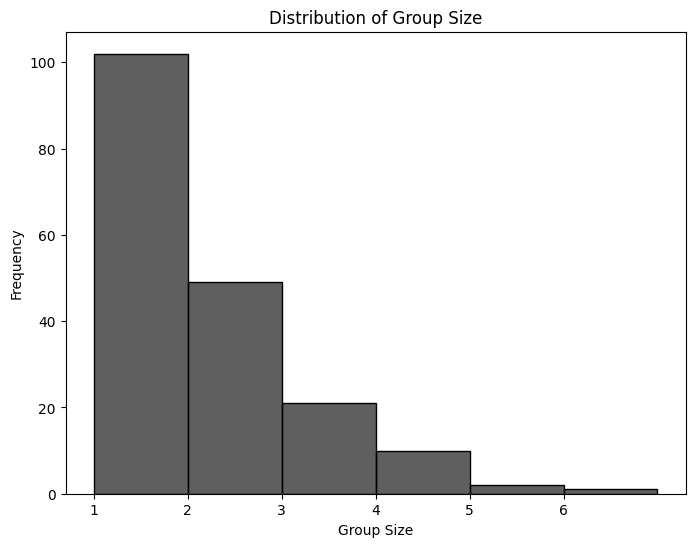

In [18]:
# Histogram for Group Size

plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x='Group Size', bins=range(1, df_cleaned['Group Size'].max() + 2), kde=False, color='#2A2A2A')
plt.title('Distribution of Group Size')
plt.xlabel('Group Size')
plt.ylabel('Frequency')
plt.xticks(range(1, df_cleaned['Group Size'].max() + 1)) # Set x-ticks at integer values
plt.show()

**Distribution of Customer Visits by Day of the Week (Normalized)**

Customer Visits by Day of the Week (Proportion %):
Day of the Week
sun    43.243243
thu    21.621622
wed    12.432432
tue    11.891892
sat    10.810811
Name: proportion, dtype: float64


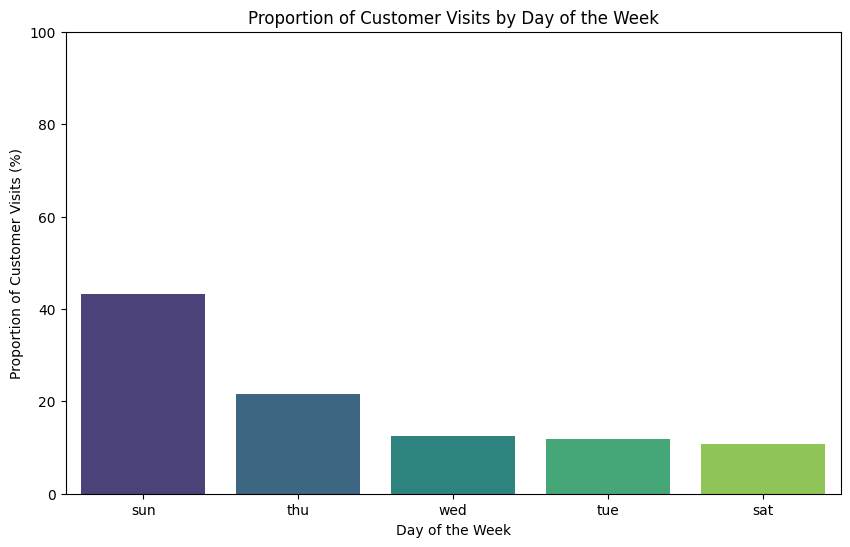

In [19]:
# Calculate the proportion of transactions for each day of the week
customer_visits_by_day_normalized = df_cleaned['Day of the Week'].value_counts(normalize=True) * 100

print("Customer Visits by Day of the Week (Proportion %):")
print(customer_visits_by_day_normalized)

# Visualize the normalized distribution using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_visits_by_day_normalized.index, y=customer_visits_by_day_normalized.values, palette='viridis')
plt.title('Proportion of Customer Visits by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Proportion of Customer Visits (%)')
plt.ylim(0, 100) # Set y-axis limit to 100%
plt.show()

**Distribution of Customer Visits by Day of the Week**

In [20]:
# Count the number of data points (transactions) for each day of the week
transactions_by_day = df_cleaned['Day of the Week'].value_counts()

print("Number of transactions recorded for each day of the week:")
print(transactions_by_day)

# Optional: Display as a table
transactions_by_day_df = transactions_by_day.reset_index()
transactions_by_day_df.columns = ['Day of the Week', 'Transaction Count']
display(transactions_by_day_df)

Number of transactions recorded for each day of the week:
Day of the Week
sun    80
thu    40
wed    23
tue    22
sat    20
Name: count, dtype: int64


,Day of the Week,Transaction Count
0,sun,80
1,thu,40
2,wed,23
3,tue,22
4,sat,20


**Tatte customer gender distribution**

In [21]:
# Analysis of Customer Gender Distribution

# Calculate the total number of male and female customers across all transactions
total_males = df_cleaned['Male'].sum()
total_females = df_cleaned['Female'].sum()

# Calculate the total number of customers (sum of males and females in each transaction)
# Note: This assumes Group Size = Male + Female for each transaction.
# If not, we might need to reconsider how to define "total customers".
# Assuming for this analysis that the 'Male' and 'Female' columns represent counts within each transaction.
total_customers = total_males + total_females

print(f"Total Male Customers: {total_males}")
print(f"Total Female Customers: {total_females}")
print(f"Total Customers (based on Male + Female columns): {total_customers}")

# Calculate the proportion or percentage of each gender
if total_customers > 0:
    male_proportion = total_males / total_customers
    female_proportion = total_females / total_customers
    print(f"\nProportion of Male Customers: {male_proportion:.2f}")
    print(f"Proportion of Female Customers: {female_proportion:.2f}")

    male_percentage = male_proportion * 100
    female_percentage = female_proportion * 100
    print(f"\nPercentage of Male Customers: {male_percentage:.1f}%")
    print(f"Percentage of Female Customers: {female_percentage:.1f}%")

    # Optional: Display as a simple table
    gender_distribution = pd.DataFrame({
        'Gender': ['Male', 'Female'],
        'Count': [total_males, total_females],
        'Proportion': [male_proportion, female_proportion],
        'Percentage (%)': [male_percentage, female_percentage]
    })
    display(gender_distribution)

else:
    print("\nNo customer gender data available (sum of Male and Female columns is zero).")

Total Male Customers: 153
Total Female Customers: 167
Total Customers (based on Male + Female columns): 320

Proportion of Male Customers: 0.48
Proportion of Female Customers: 0.52

Percentage of Male Customers: 47.8%
Percentage of Female Customers: 52.2%


,Gender,Count,Proportion,Percentage (%)
0,Male,153,0.478125,47.8125
1,Female,167,0.521875,52.1875


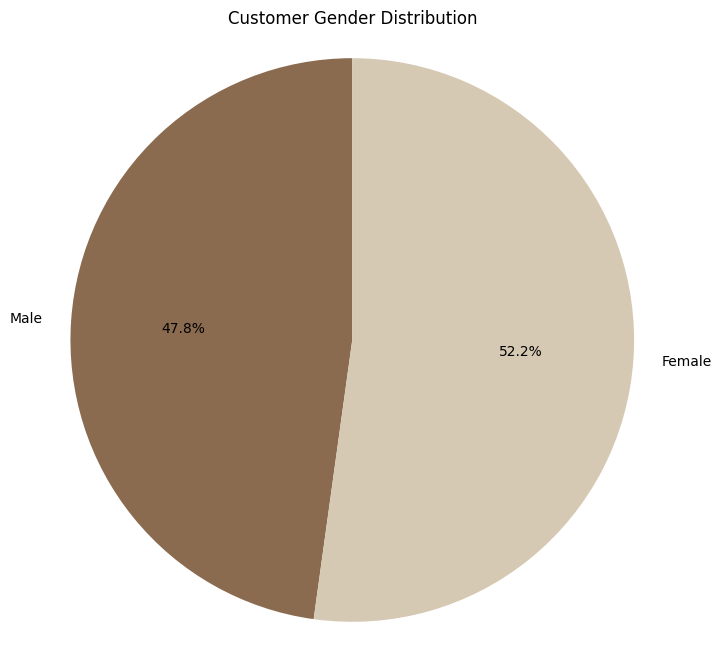

In [22]:
# Visualization of Customer Gender Distribution (Pie Chart)

# Use the gender_distribution DataFrame created in the previous cell
# Assuming the DataFrame is available in the environment

colors = ['#8B6B4F', '#D6C9B3'] # Using two colors from the preferred palette

plt.figure(figsize=(8, 8))
plt.pie(gender_distribution['Count'], labels=gender_distribution['Gender'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#** t-test for Do dine-in orders have a significantly higher average cost than take-out orders?

One-tailed t-test Dine-in > Take-out

H0: There's no different between average dine in cost(expense) with average take out cost(expense) p_value >= 0.05

H1: There's significent different between average dine in cost(expense) with average take out cost(expense)p_value < 0.05

In [23]:
# Test: Do dine-in orders have a significantly higher average cost than take-out orders?
avg_dine_in_cost = df_cleaned[df_cleaned['Order Type'] == 'dine in']['Cost'].mean()
avg_take_out_cost = df_cleaned[df_cleaned['Order Type'] == 'take out']['Cost'].mean()

print(f"Average Cost for Dine-in Orders: ${avg_dine_in_cost:.2f}")
print(f"Average Cost for Take-out Orders: ${avg_take_out_cost:.2f}")

# Separate the data into two groups based on 'Order Type'
dine_in_costs = df_cleaned[df_cleaned['Order Type'] == 'dine in']['Cost']
take_out_costs = df_cleaned[df_cleaned['Order Type'] == 'take out']['Cost']

# Perform independent two-sample t-test
from scipy.stats import ttest_ind

# We are testing if dine-in cost is *significantly higher* than take-out cost.
# This is a one-tailed test. The alternative hypothesis is that the mean of dine-in is greater than the mean of take-out.
# The ttest_ind function performs a two-tailed test by default.
# To get the p-value for a one-tailed test (greater than), we can divide the two-tailed p-value by 2
# if the t-statistic is positive (mean of group 1 > mean of group 2), or 1 - (two-tailed p-value / 2) if the t-statistic is negative.
# Alternatively, some versions of scipy.stats.ttest_ind support the 'alternative' parameter.
# Let's use the 'alternative' parameter if available (requires scipy 1.6.0 or later).
# If not available, we'll adjust the two-tailed p-value manually.

# Check if 'alternative' parameter is supported
if 'alternative' in ttest_ind.__code__.co_varnames:
    t_stat, p_value = ttest_ind(dine_in_costs, take_out_costs, alternative='greater')
    test_type = "One-tailed t-test (Dine-in > Take-out)"
else:
    # Perform two-tailed test and adjust p-value manually
    t_stat, two_tailed_p_value = ttest_ind(dine_in_costs, take_out_costs)
    if t_stat > 0:
        p_value = two_tailed_p_value / 2
    else:
        # If t-stat is not positive, the data does not support the alternative hypothesis (dine-in > take-out)
        # The one-tailed p-value in this case would be 1 - (two_tailed_p_value / 2)
        # However, for the specific hypothesis "significantly higher", if t-stat is not positive, we fail to reject.
        # A simpler approach for interpretation with a negative t-stat is to just use the two-tailed p-value
        # and note that the difference is not in the hypothesized direction, or set p-value to 1.
        # Let's stick to the standard one-tailed adjustment for positive t-stat and interpret accordingly.
        p_value = 1 - (two_tailed_p_value / 2) # Or just use the two-tailed p-value and interpret


    test_type = "Two-tailed t-test (p-value adjusted for one-tailed interpretation)"
    print(f"(Note: Performed two-tailed test and adjusted p-value for one-tailed interpretation)")


print(f"\n{test_type} Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print(f"\nWith a p-value of {p_value:.4f} (less than alpha = {alpha}), we reject the null hypothesis.")
    if t_stat > 0:
         print("Conclusion: There is significant evidence that the average cost of dine-in orders is higher than take-out orders.")
    else:
        print("Conclusion: There is significant evidence of a difference in average cost, but not specifically that dine-in is *higher* than take-out.")

else:
    print(f"\nWith a p-value of {p_value:.4f} (greater than or equal to alpha = {alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to conclude that the average cost of dine-in orders is significantly higher than take-out orders.")

Average Cost for Dine-in Orders: $26.70
Average Cost for Take-out Orders: $19.77
(Note: Performed two-tailed test and adjusted p-value for one-tailed interpretation)

Two-tailed t-test (p-value adjusted for one-tailed interpretation) Results:
T-statistic: 2.3155
P-value: 0.0108

With a p-value of 0.0108 (less than alpha = 0.05), we reject the null hypothesis.
Conclusion: There is significant evidence that the average cost of dine-in orders is higher than take-out orders.


In [24]:
fig = px.histogram(df_cleaned, x='Cost', color='Order Type', barmode= 'overlay')
fig.show()